### Aula 1

In [93]:
# Aula 1 - Pandas Comandos Básicos
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')

df.head(10)

df.info()

df.describe()

df.shape

linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('colunas:', colunas)

df.columns

renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}
df.rename(columns=renomear_colunas, inplace=True)
df.head()

df['senioridade'].value_counts()

df['contrato'].value_counts()

df['remoto'].value_counts()

df['tamanho_empresa'].value_counts()

senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

tipo_trabalho = {
    'FT': 'Integral',
    'PT': 'Meio-Período',
    'CT': 'Contrato',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(tipo_trabalho)
df['contrato'].value_counts()

mapa_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(mapa_remoto)
df['remoto'].value_counts()

mapa_tamanho = {
    'S': 'Pequeno',
    'M': 'Médio',
    'L': 'Grande'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(mapa_tamanho)
df['tamanho_empresa'].value_counts()

df.head()

df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB
Linhas: 133349
colunas: 11


,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


### Aula 2

In [94]:
df.isnull()

df.head()

df.isnull().sum()

df['ano'].unique()

df[df.isnull().any(axis=1)]

import numpy as np

# criação de um df para exemplo
df_salarios = pd.DataFrame({
    'nome': ['João', 'Maria', 'José', 'Ana', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

# substitui os nulls pela media
df_salarios['salario_media']= df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# substitui os nulls pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

df_temperaturas = pd.DataFrame({
    'DiaSemana': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

# completa com o valor anterior
df_temperaturas['preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas

# completa com o valor posterior
df_temperaturas['preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

df_cidades = pd.DataFrame({
    'nome': ['João', 'Maria', 'José', 'Ana', 'Val'],
    'cidades': ['São Paulo', np.nan, 'Belo Horizonte', np.nan, 'Rio de Janeiro']
})

df_cidades['fill_cidades'] = df_cidades['cidades'].fillna('Não Informado')

df_limpo = df.dropna()

df_limpo.isnull().sum()

df_limpo.head()

df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


### Aula 3


In [95]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Júnior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

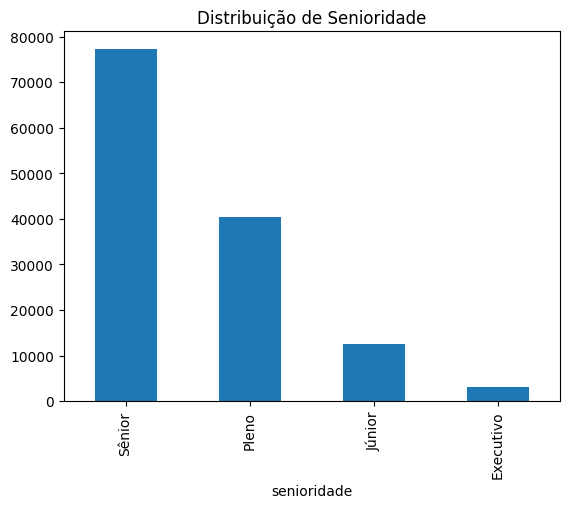

In [96]:
# plot com pandas
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [97]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

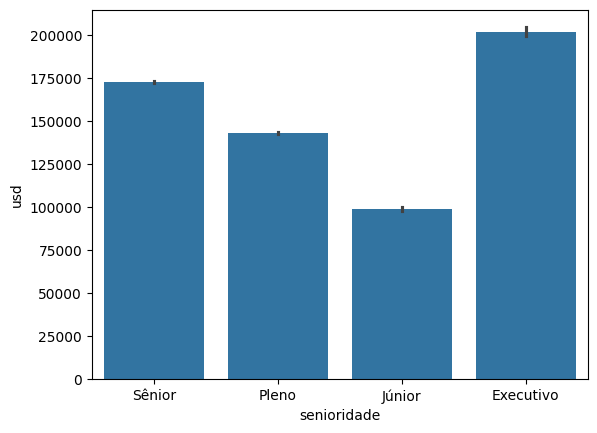

In [98]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [99]:
import matplotlib.pyplot as plt

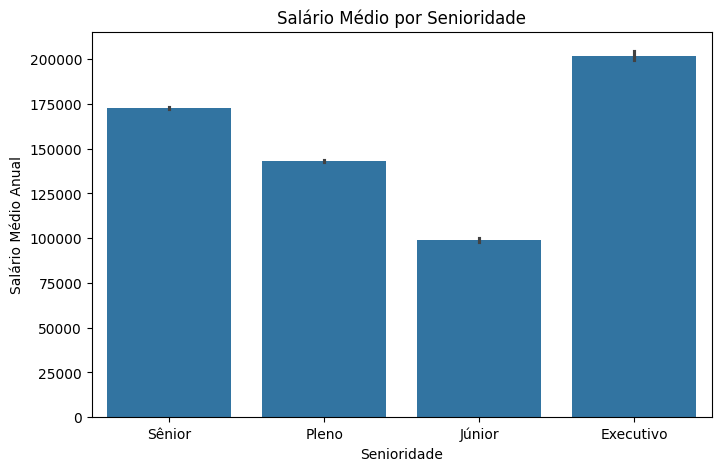

In [100]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual')
plt.show()

In [101]:
df_limpo.groupby(by='senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Júnior,99034.963267


In [102]:
df_ordem = df_limpo.groupby(by='senioridade')['usd'].mean().sort_values(ascending=True).index
df_ordem

Index(['Júnior', 'Pleno', 'Sênior', 'Executivo'], dtype='object', name='senioridade')

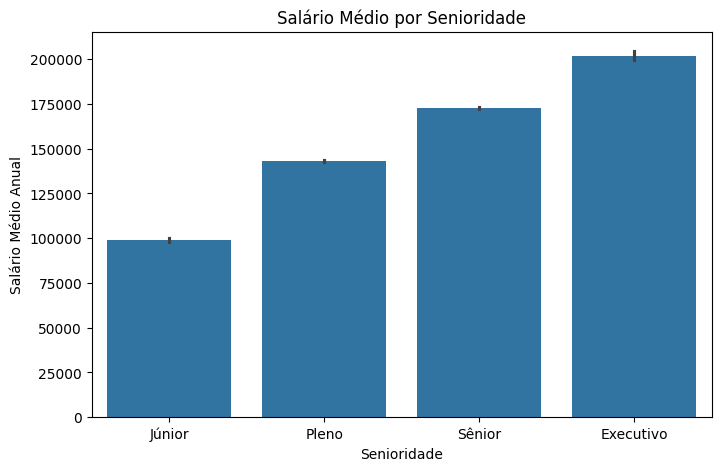

In [103]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=df_ordem)
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual')
plt.show()

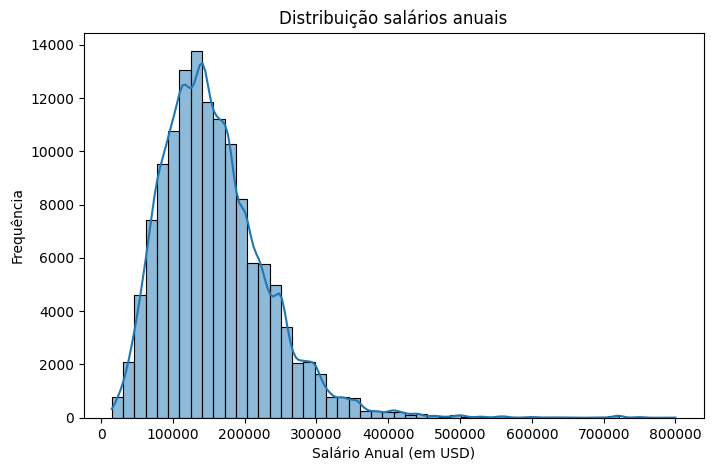

In [104]:
plt.figure(figsize=(8, 5))
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição salários anuais')
plt.xlabel('Salário Anual (em USD)')
plt.ylabel('Frequência')
plt.show()

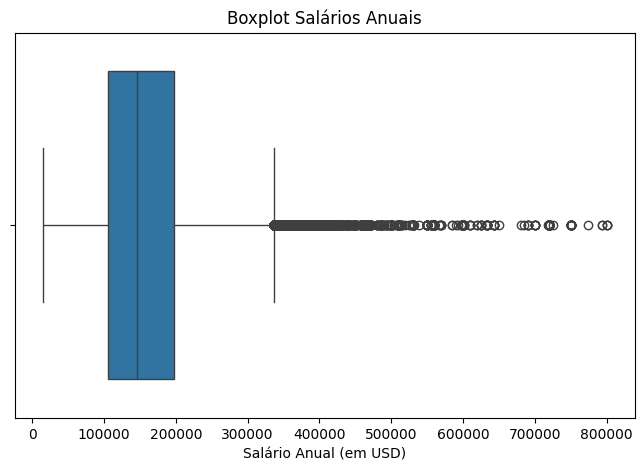

In [105]:
# melhor para ver variância e outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot Salários Anuais')
plt.xlabel('Salário Anual (em USD)')
plt.show()

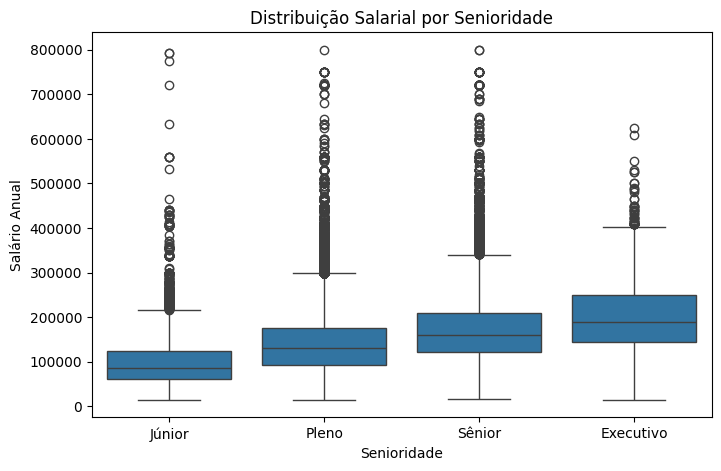

In [106]:
# possível ver a variância, outliers e mediana das senioridades
ordem_senior = ['Júnior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senior)
plt.title('Distribuição Salarial por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Anual')
plt.show()

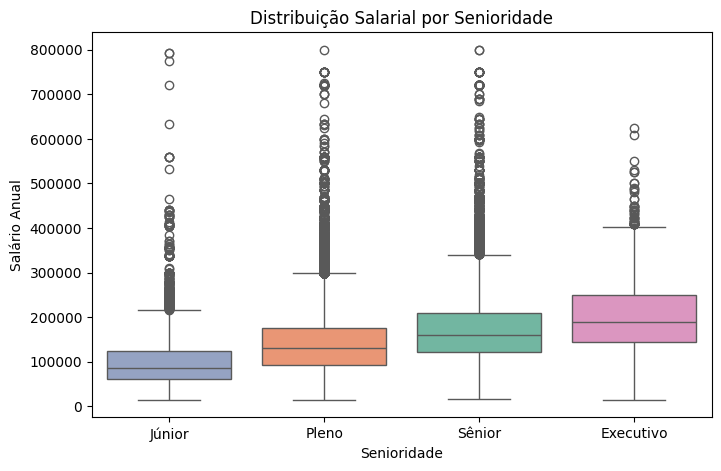

In [107]:
ordem_senior = ['Júnior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senior, palette='Set2', hue='senioridade')
plt.title('Distribuição Salarial por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Anual')
plt.show()

In [108]:
import plotly.express as px

In [109]:
senioridade_media_salarial = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salarial,
             x='senioridade',
             y='usd',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [110]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção Tipos de Trabalho',
             hole=0.5)

fig.update_traces(textinfo='percent+label')
fig.show()

In [111]:
filtro = df_limpo['cargo'] == 'Data Scientist'
df_cientista = df_limpo[filtro].reset_index()
df_cientista

,index,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,6,2025,Sênior,Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Médio
1,7,2025,Sênior,Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Médio
2,8,2025,Pleno,Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Médio
3,9,2025,Pleno,Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Médio
4,65,2025,Sênior,Integral,Data Scientist,258000,USD,258000,US,Presencial,US,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...
17306,133339,2021,Sênior,Integral,Data Scientist,168000,USD,168000,JP,Presencial,JP,Pequeno
17307,133340,2021,Pleno,Integral,Data Scientist,160000,SGD,119059,SG,Remoto,IL,Médio
17308,133344,2020,Sênior,Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
17309,133346,2020,Júnior,Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequeno


In [112]:
df_pais = df_cientista.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()
df_pais.columns = 'país', 'salario_medio_anual'
df_top5 = df_pais.head(5)
df_top5

,país,salario_medio_anual
0,US,162802.494603
1,SG,152522.714286
2,BG,152500.000000
3,CH,152256.666667
4,EG,140690.909091


In [113]:
fig = px.bar(df_top5,
             x='país',
             y='salario_medio_anual',
             labels={'país': 'País Residente', 'salario_medio_anual': 'Salário Médio Anual (em USD)'},
             title='Top 5 Países com maior média salarial para cientista de dados')

fig.show()